In [7]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load in data, specifying the encoding
sales_data = pd.read_csv("/content/Sample - Superstore.csv", encoding='latin-1') # or 'cp1252', try different encodings if this doesn't work

# peek at first few rows of data
sales_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


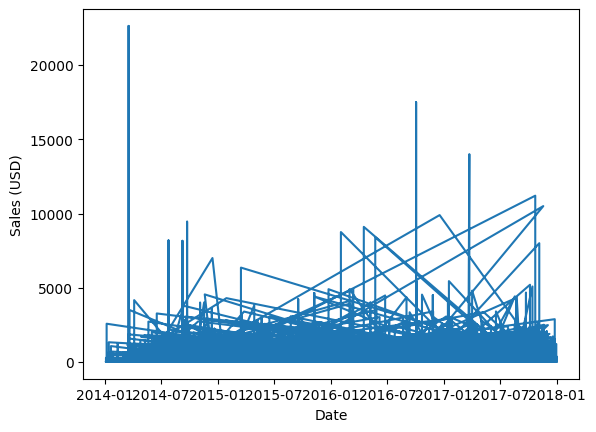

In [9]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load in data, specifying the encoding
sales_data = pd.read_csv("/content/Sample - Superstore.csv", encoding='latin-1') # or 'cp1252', try different encodings if this doesn't work

# peek at first few rows of data
sales_data.head()

# Check the column names of the DataFrame
print(sales_data.columns)

# convert string to datetime64
# Assuming 'Order Date' column exists and should be used as index:
sales_data.index = pd.to_datetime(sales_data["Order Date"]) # Replace 'Date' with actual date column name if different

# create line plot of sales data
# Replace 'Sales' with the actual sales column name if different
plt.plot(sales_data.index, sales_data["Sales"])
plt.xlabel("Date")
plt.ylabel("Sales (USD)")
plt.show()

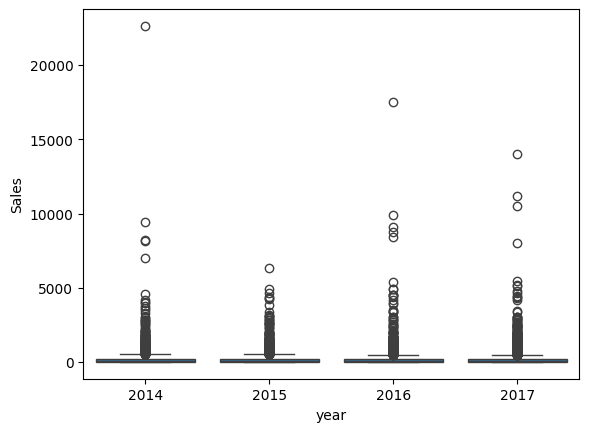

In [11]:
# extract year from 'Order Date' column
sales_data["year"] = pd.to_datetime(sales_data["Order Date"]).dt.year

# box plot grouped by year
sns.boxplot(data=sales_data, x="year", y="Sales") # Also changed 'sales' to 'Sales' assuming it's the sales column
plt.show()

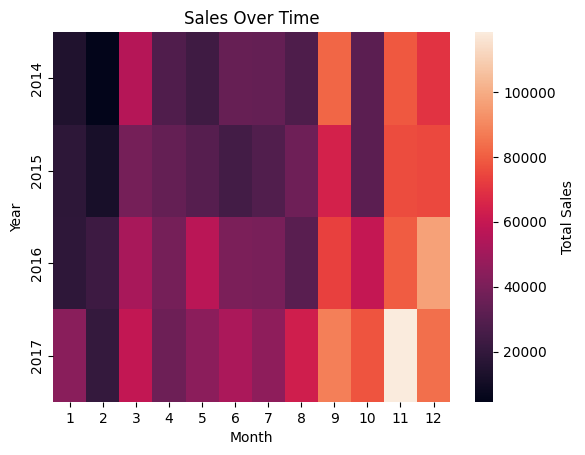

In [13]:
# extract year and month from 'Order Date' column
sales_data["year"] = pd.to_datetime(sales_data["Order Date"]).dt.year
sales_data["month"] = pd.to_datetime(sales_data["Order Date"]).dt.month # Extract month

# calculate total sales for each month
sales = sales_data.groupby(["year", "month"])['Sales'].sum() # Specify 'Sales' column for sum

# re-format the data for the heat-map
sales_month_year = sales.reset_index().pivot(index="year", columns="month", values="Sales") # Use 'Sales' for values

# create heatmap
sns.heatmap(sales_month_year, cbar_kws={"label": "Total Sales"})
plt.title("Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

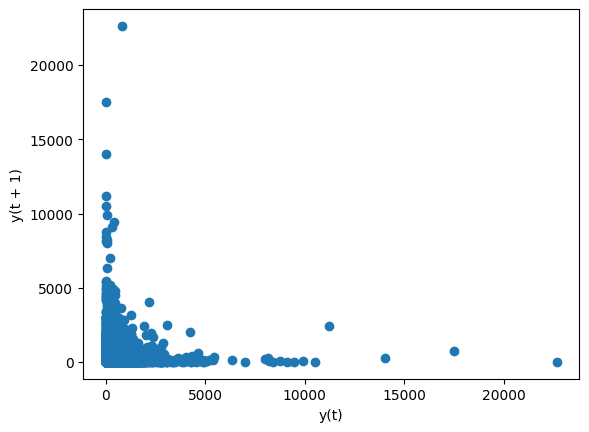

In [15]:
# import lag_plot function
from pandas.plotting import lag_plot

# lag scatter plot using 'Sales' column
lag_plot(sales_data['Sales']) # Specify the numerical column 'Sales' for the lag plot
plt.show()

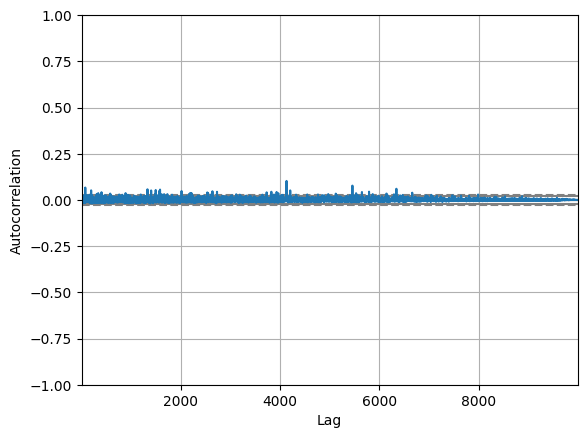

In [17]:
# import autocorrelation function
from pandas.plotting import autocorrelation_plot

# autocorrelation plot using the 'Sales' column
autocorrelation_plot(sales_data['Sales'])  # Replace 'Sales' with your desired numeric column if needed
plt.show()